<a href="https://colab.research.google.com/github/Fedelberg/python_project/blob/main/personal_finance_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving personal_finance_dataset.xlsx to personal_finance_dataset.xlsx


In [ ]:
personal_finance_dataset = "personal_finance_dataset.xlsx"

In [ ]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel(personal_finance_dataset)

# Display the DataFrame
print(df.shape)
print(df.head())

(32424, 20)
  user_id  age  gender education_level employment_status    job_title  \
0  U00001   56  Female     High School     Self-employed  Salesperson   
1  U00002   19  Female             PhD          Employed  Salesperson   
2  U00003   20  Female          Master          Employed      Teacher   
3  U00004   25    Male             PhD          Employed      Manager   
4  U00005   53  Female             PhD          Employed      Student   

   monthly_income_usd  monthly_expenses_usd  savings_usd has_loan  loan_type  \
0             3531.69               1182.59    367655.03       No        NaN   
1             3531.73               2367.99    260869.10      Yes  Education   
2             2799.49               1003.91    230921.21       No        NaN   
3             5894.88               4440.12    304815.51      Yes   Business   
4             5128.93               4137.61    461509.48       No        NaN   

   loan_amount_usd  loan_term_months  monthly_emi_usd  loan_interest

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  32424 non-null  object        
 1   age                      32424 non-null  int64         
 2   gender                   32424 non-null  object        
 3   education_level          32424 non-null  object        
 4   employment_status        32424 non-null  object        
 5   job_title                32424 non-null  object        
 6   monthly_income_usd       32424 non-null  float64       
 7   monthly_expenses_usd     32424 non-null  float64       
 8   savings_usd              32424 non-null  float64       
 9   has_loan                 32424 non-null  object        
 10  loan_type                12995 non-null  object        
 11  loan_amount_usd          32424 non-null  float64       
 12  loan_term_months         32424 n

In [ ]:
df.isnull().sum()

,0
user_id,0
age,0
gender,0
education_level,0
employment_status,0
job_title,0
monthly_income_usd,0
monthly_expenses_usd,0
savings_usd,0
has_loan,0


In [ ]:
# Explore the dataset
print(df.head())
print(df.info())

  user_id  age  gender education_level employment_status    job_title  \
0  U00001   56  Female     High School     Self-employed  Salesperson   
1  U00002   19  Female             PhD          Employed  Salesperson   
2  U00003   20  Female          Master          Employed      Teacher   
3  U00004   25    Male             PhD          Employed      Manager   
4  U00005   53  Female             PhD          Employed      Student   

   monthly_income_usd  monthly_expenses_usd  savings_usd has_loan  loan_type  \
0             3531.69               1182.59    367655.03       No        NaN   
1             3531.73               2367.99    260869.10      Yes  Education   
2             2799.49               1003.91    230921.21       No        NaN   
3             5894.88               4440.12    304815.51      Yes   Business   
4             5128.93               4137.61    461509.48       No        NaN   

   loan_amount_usd  loan_term_months  monthly_emi_usd  loan_interest_rate_pct  \

In [ ]:
# Calculate debt-to-income ratio
df['debt_to_income_ratio'] = df['loan_amount_usd'] / df['monthly_income_usd']

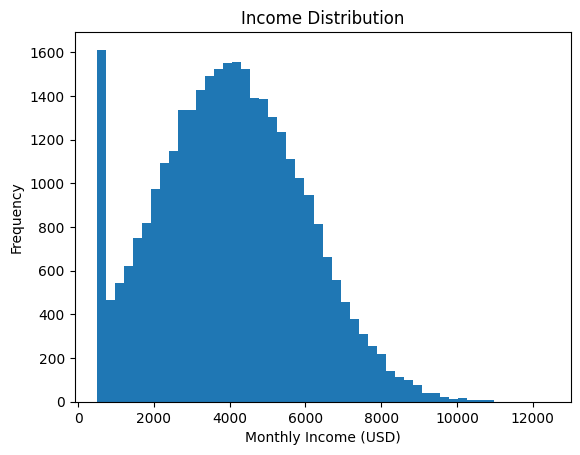

In [ ]:
# Visualize income distribution
plt.hist(df['monthly_income_usd'], bins=50)
plt.title('Income Distribution')
plt.xlabel('Monthly Income (USD)')
plt.ylabel('Frequency')
plt.show()

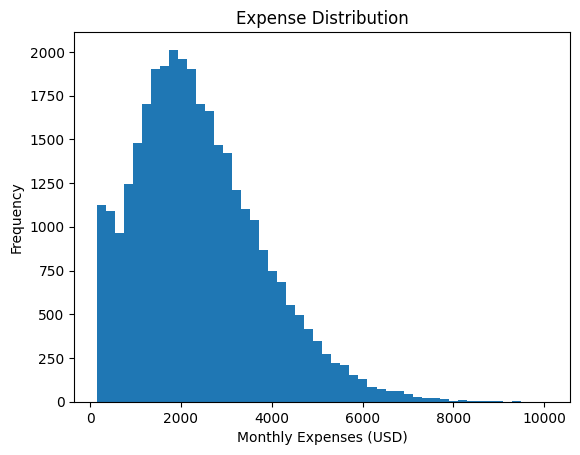

In [ ]:
# Visualize expense distribution
plt.hist(df['monthly_expenses_usd'], bins=50)
plt.title('Expense Distribution')
plt.xlabel('Monthly Expenses (USD)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate savings rate
df['savings_rate'] = df['savings_usd'] / df['monthly_income_usd']

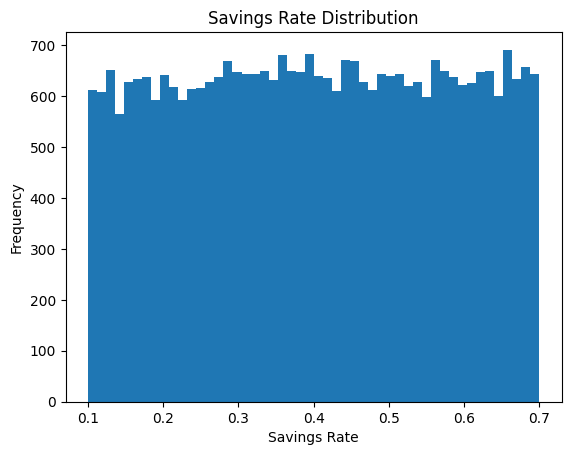

In [ ]:
# Visualize savings rate distribution
plt.hist(df['savings_rate'], bins=50)
plt.title('Savings Rate Distribution')
plt.xlabel('Savings Rate')
plt.ylabel('Frequency')
plt.show()

## Handle missing Value

In [ ]:
# Handle missing loan type
df['loan_type'] = df['loan_type'].fillna('No Loan')


## Identify outliers

In [ ]:
# Identify outliers in income and expenses
income_outliers = df[(df['monthly_income_usd'] < 0) | (df['monthly_income_usd'] > df['monthly_income_usd'].quantile(0.99))]
expenses_outliers = df[(df['monthly_expenses_usd'] < 0) | (df['monthly_expenses_usd'] > df['monthly_expenses_usd'].quantile(0.99))]


In [ ]:
# Handle outliers (e.g., remove or transform)
df = df[(df['monthly_income_usd'] >= 0) & (df['monthly_income_usd'] <= df['monthly_income_usd'].quantile(0.99))]
df = df[(df['monthly_expenses_usd'] >= 0) & (df['monthly_expenses_usd'] <= df['monthly_expenses_usd'].quantile(0.99))]


In [ ]:
# Consistency check for loan amount and loan type
df.loc[df['loan_type'] == 'No Loan', 'loan_amount_usd'] = 0

In [ ]:
# Verify changes
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 31778 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  31778 non-null  object        
 1   age                      31778 non-null  int64         
 2   gender                   31778 non-null  object        
 3   education_level          31778 non-null  object        
 4   employment_status        31778 non-null  object        
 5   job_title                31778 non-null  object        
 6   monthly_income_usd       31778 non-null  float64       
 7   monthly_expenses_usd     31778 non-null  float64       
 8   savings_usd              31778 non-null  float64       
 9   has_loan                 31778 non-null  object        
 10  loan_type                31778 non-null  object        
 11  loan_amount_usd          31778 non-null  float64       
 12  loan_term_months         31778 non-nu

## Feature Engineering

In [ ]:
#income to expenses ratio
df['income_to_expenses_ratio'] = df['monthly_income_usd'] / df['monthly_expenses_usd']

In [ ]:
#saving rate
df['savings_rate'] = (df['monthly_income_usd'] - df['monthly_expenses_usd']) / df['monthly_income_usd']

In [ ]:
#Credit Utilization
df['credit_utilization_ratio'] = df['loan_amount_usd'] / (df['monthly_emi_usd'] * df['loan_term_months'])

In [ ]:
#Age group
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, np.inf], labels=['18-24', '25-34', '35-44', '45-54', '55+'])

In [ ]:
#Region encoding
region_dummies = pd.get_dummies(df['region'])
df = pd.concat([df, region_dummies], axis=1)

In [ ]:
 #Calculate debt-to-income ratio
df['debt_to_income_ratio'] = df['loan_amount_usd'] / df['monthly_income_usd']

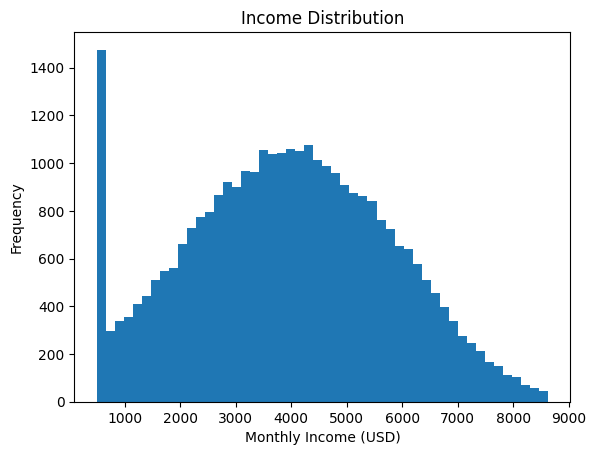

In [ ]:
# Visualize income distribution
plt.hist(df['monthly_income_usd'], bins=50)
plt.title('Income Distribution')
plt.xlabel('Monthly Income (USD)')
plt.ylabel('Frequency')
plt.show()

## *EXPLORATORY DATA ANALYSIS*

*Distribution of Variable*

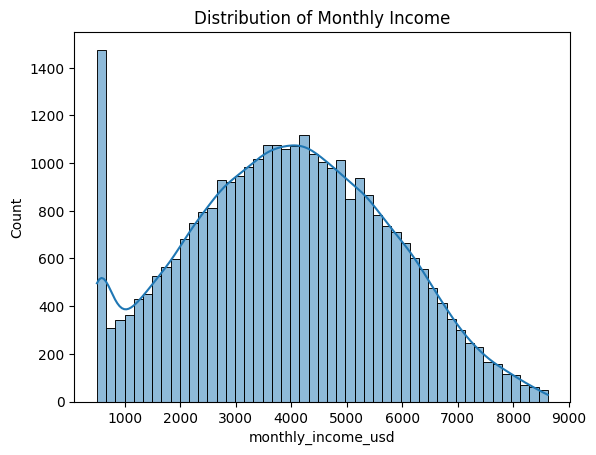

In [ ]:

sns.histplot(df['monthly_income_usd'], kde=True)
plt.title('Distribution of Monthly Income')
plt.show()

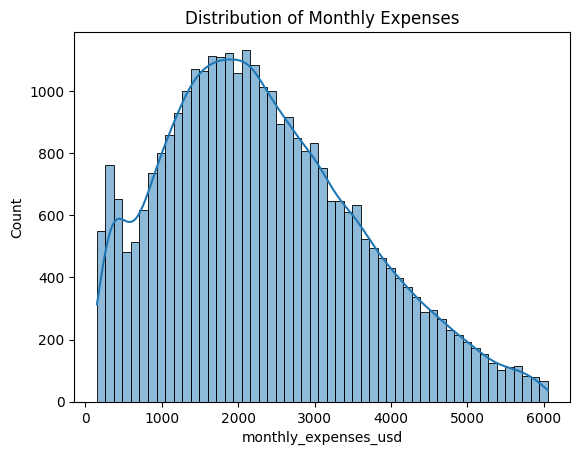

In [ ]:
sns.histplot(df['monthly_expenses_usd'], kde=True)
plt.title('Distribution of Monthly Expenses')
plt.show()

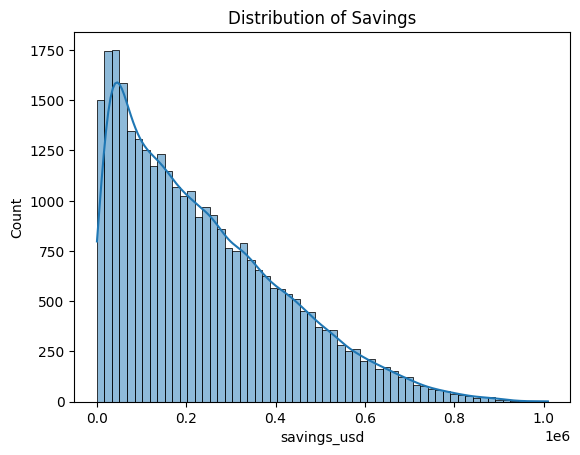

In [ ]:
sns.histplot(df['savings_usd'], kde=True)
plt.title('Distribution of Savings')
plt.show();

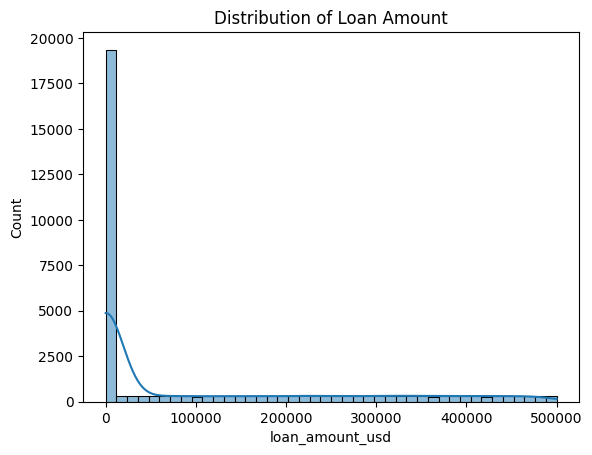

In [ ]:

sns.histplot(df['loan_amount_usd'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

### *Correlation Analysis*

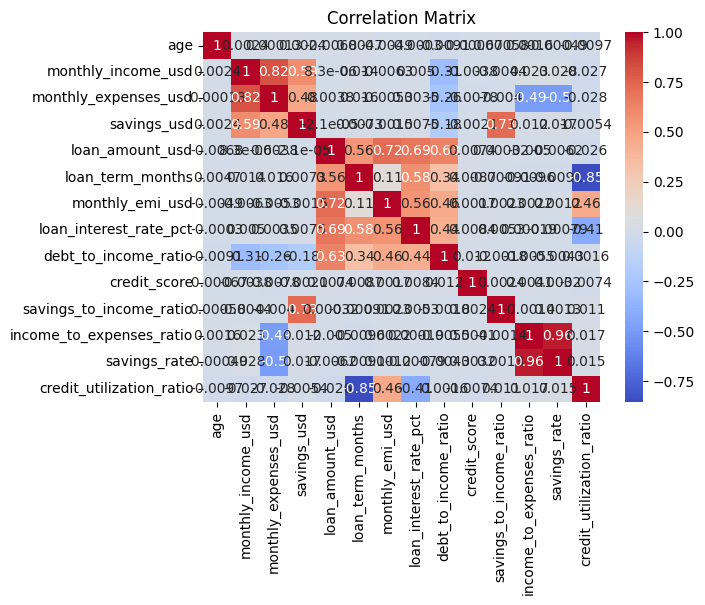

In [ ]:
# Calculate the correlation matrix, excluding non-numeric columns
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

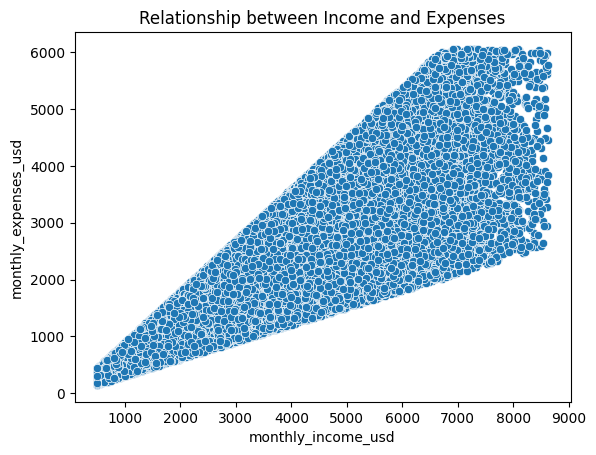

In [ ]:
sns.scatterplot(x='monthly_income_usd', y='monthly_expenses_usd', data=df)
plt.title('Relationship between Income and Expenses')
plt.show()

#### *Groupby Analysis*

In [ ]:
age_group_avg_income = df.groupby('age_group')['monthly_income_usd'].mean()
print(age_group_avg_income)

age_group
18-24    3897.755167
25-34    3952.357708
35-44    3916.932277
45-54    3967.041545
55+      3934.288611
Name: monthly_income_usd, dtype: float64


/tmp/ipython-input-1003462642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_income = df.groupby('age_group')['monthly_income_usd'].mean()


In [ ]:
region_avg_expenses = df.groupby('region')['monthly_expenses_usd'].mean()
print(region_avg_expenses)

region
Africa           2359.265434
Asia             2336.549306
Europe           2364.724636
North America    2321.468347
Other            2342.463524
Name: monthly_expenses_usd, dtype: float64


#### *Outlier Detention*

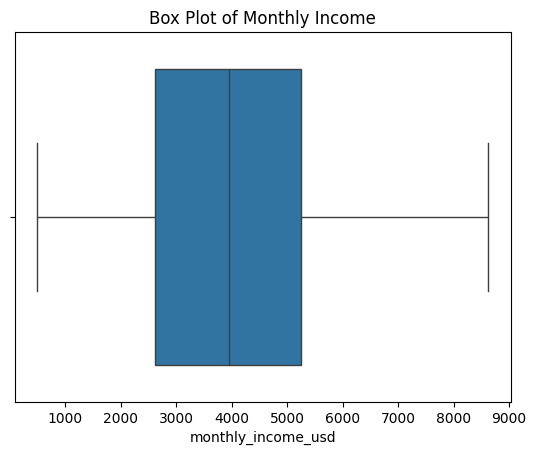

In [ ]:
sns.boxplot(x=df['monthly_income_usd'])
plt.title('Box Plot of Monthly Income')
plt.show()


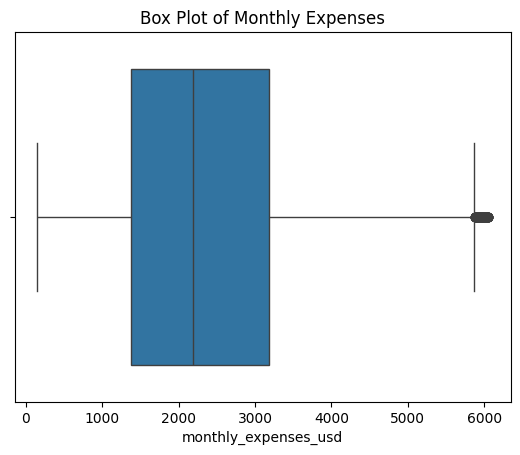

In [ ]:
sns.boxplot(x=df['monthly_expenses_usd'])
plt.title('Box Plot of Monthly Expenses')
plt.show();

## **Linear Regression Moddel**

Model to predict continuous variables like "monthly savings or expenses"

In [ ]:

# Select features (X) and target (y)
X = df.drop(['monthly_expenses_usd', 'record_date', 'user_id'], axis=1)
y = df['monthly_expenses_usd']

# Identify numerical columns for imputation
numerical_cols = X.select_dtypes(include=np.number).columns

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Handle categorical columns (one-hot encoding)
X = pd.get_dummies(X, columns=['gender', 'education_level', 'employment_status', 'job_title', 'has_loan', 'loan_type', 'age_group', 'region'], dummy_na=False)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 98579.7255189613


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

MSE: 0.0
MAE: 0.0
R2: 1.0


**Check for Overfitting**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')

MSE Train: 2.1257363042031668e-26
MSE Test: 2.0843209613141624e-26
R2 Train: 1.0
R2 Test: 1.0


**HyperTunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'fit_intercept': True}
Best Score: 1.0


**LogisticRegression**

Model to predicts categorical variables like "Loan approval or credit risk"

In [ ]:
X = df.drop(['has_loan', 'user_id', 'record_date'], axis=1)
y = df['has_loan'].map({'Yes': 1, 'No': 0})

# Identify numerical columns for imputation
numerical_cols = X.select_dtypes(include=np.number).columns

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Handle categorical columns (one-hot encoding)
X = pd.get_dummies(X, columns=['gender', 'education_level', 'employment_status', 'job_title', 'loan_type', 'age_group', 'region'], dummy_na=False)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['monthly_income_usd', 'monthly_expenses_usd']])

labels = kmeans.labels_
print(labels)

[3 3 3 ... 3 1 0]


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette = silhouette_score(df[['monthly_income_usd', 'monthly_expenses_usd']], labels)
calinski_harabasz = calinski_harabasz_score(df[['monthly_income_usd', 'monthly_expenses_usd']], labels)

print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Silhouette Score: 0.3936835807917759
Calinski-Harabasz Index: 51747.88482262631


In [ ]:
!pip install streamlit
import streamlit as st

# Your Streamlit code here

# To run the app, use the following command
!streamlit run /content/your_script.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /content/your_script.py
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


## **Interactive Dashboard**

In [ ]:
import streamlit as st
import pandas as pd

# Initialize the app
st.title('Personal Finance Tracker')

# Create a dictionary to store financial data
financial_data = {
    'Income': [],
    'Expenses': [],
    'Savings': []
}

# Function to add income
def add_income():
    st.subheader('Add Income')
    income_amount = st.number_input('Amount')
    income_source = st.text_input('Source')
    if st.button('Add'):
        financial_data['Income'].append({'Amount': income_amount, 'Source': income_source})

# Function to add expenses
def add_expenses():
    st.subheader('Add Expenses')
    expense_amount = st.number_input('Amount')
    expense_category = st.selectbox('Category', ['Housing', 'Food', 'Transportation', 'Entertainment'])
    if st.button('Add'):
        financial_data['Expenses'].append({'Amount': expense_amount, 'Category': expense_category})

# Function to calculate savings
def calculate_savings():
    total_income = sum([income['Amount'] for income in financial_data['Income']])
    total_expenses = sum([expense['Amount'] for expense in financial_data['Expenses']])
    savings = total_income - total_expenses
    return savings

# Create tabs for income, expenses, and savings
tab1, tab2, tab3 = st.tabs(['Income', 'Expenses', 'Savings'])

with tab1:
    add_income()
    st.write(financial_data['Income'])

with tab2:
    add_expenses()
    st.write(financial_data['Expenses'])

with tab3:
    savings = calculate_savings()
    st.write(f'Savings: {savings}')

2025-09-21 20:25:02.151 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 20:25:02.337 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-21 20:25:02.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 20:25:02.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 20:25:02.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 20:25:02.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 20:25:02.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-21 20:25:02.345 Thread 'MainThread': mi